## Luca Ambrosio
### Final Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import sklearn.ensemble
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

### 1. Calculate the number of users and artists present in the network.

In [2]:
data1 = pd.read_csv("artists.csv",error_bad_lines=False, sep = '\t')
data2 = pd.read_csv("user_artists.csv",error_bad_lines=False, sep = '\t')
data3 = pd.read_csv("user_friends.csv",error_bad_lines=False, sep = '\t')
data4 = pd.read_csv("user_artists.csv",error_bad_lines=False, sep = '\t')
data5 = pd.read_csv("user_taggedartists_timestamps.csv",error_bad_lines=False, sep = '\t')
#data2 = pd.read_csv("winequality-red.csv")

In [3]:
print("number of artists: ",data1.shape[0])
print("number of users: ", len(data2["userID"].unique()))

number of artists:  17632
number of users:  1892


### 2. Calculate the number of bi-directional user-friend relations pairs

In [4]:
cont = 0 
for x in np.array(data3):
    a=x[0]
    b=x[1]
    for y in np.array(data3):
        c=y[0]
        d=y[1]
        if c == b:
            if  d==a: 
                cont = cont +1
print("the number of bi-directional user-friend relations pairs is :",cont)

the number of bi-directional user-friend relations pairs is : 25434


### 3. Calculate the average friend relations per user

In [5]:
cont=0
array = []
for x in np.array(data3):
    a=x[0]
    b=x[1]
    for y in np.array(data3):
        c=y[0]
        d=y[1]
        if a == c:
            cont = cont + 1
    array.append(cont)
    cont=0
print("the average friend relations per user",np.mean(array))

the average friend relations per user 35.727058268459544


### 4. Calculate the number of user-listened artists relations (couples user-artist).

In [6]:
cont=0
array=[]
visited=[]
for x in np.array(data4):
    a=x[0]
    b=x[1]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data4):
            c=y[0]
            d=y[1]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
print(array)

[[1430, 47], [822, 44], [1335, 48], [815, 44], [1147, 44], [2093, 44], [656, 46], [80, 44], [1273, 47], [1340, 48], [1947, 45], [1047, 45], [1484, 47], [603, 47], [1501, 47], [1530, 48], [451, 45], [50, 47], [1028, 48], [1509, 43], [576, 46], [335, 44], [1078, 42], [503, 50], [1036, 48], [1915, 43], [720, 41], [1525, 47], [780, 41], [329, 43], [409, 45], [57, 47], [1615, 47], [760, 41], [2064, 45], [809, 46], [814, 45], [217, 42], [541, 43], [1832, 47], [1993, 46], [354, 46], [1489, 45], [13, 44], [1236, 45], [1192, 47], [1577, 46], [1432, 8], [1289, 43], [1706, 44], [1754, 46], [1660, 40], [292, 45], [1618, 47], [2096, 42], [767, 43], [283, 42], [1071, 44], [1811, 47], [905, 46], [274, 46], [1699, 44], [661, 48], [1581, 38], [529, 45], [1046, 43], [543, 46], [314, 44], [1413, 43], [1426, 38], [1527, 47], [1499, 45], [560, 46], [1164, 44], [432, 43], [1157, 42], [1405, 46], [45, 44], [906, 49], [1883, 44], [888, 44], [1329, 43], [670, 44], [806, 41], [46, 45], [1474, 43], [1363, 42], [

### 5. Plot the distribution of the number of artists listened by each user, and calculate the average and mode of the distribution.

Plot the distribution of the number of artists listened by each user
calculate the average : 44.1284355179704
calculate the mode of the distribution : [45]


C:\Users\Luca\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


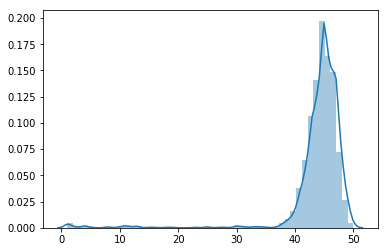

In [7]:
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of artists listened by each user")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])
 

### 6. Plot the distribution of the number of tag assignments per each artist, and calculate the average and mode of the distribution.

Plot the distribution of the number of tag assignments per each artist
calculate the average : 14.890920705901141
calculate the mode of the distribution : [1]


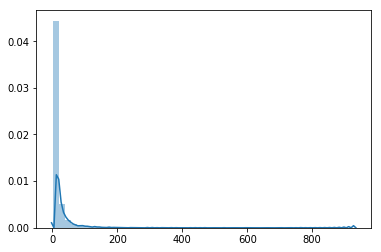

In [8]:
#numero di tag assegnati per ogni artista
#calcolare la media e la moda della distribuzione
cont=0
array=[]
visited=[]
for x in np.array(data5):
    a=x[1]
    b=x[2]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[1]
            d=y[2]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of tag assignments per each artist")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

### 7. Plot the distribution of the number of tag assignments per each user, and calculate the average and mode of the distribution.

Plot the distribution of the number of tag assignments per each user
calculate the average : 98.56183932346723
calculate the mode of the distribution : [3]


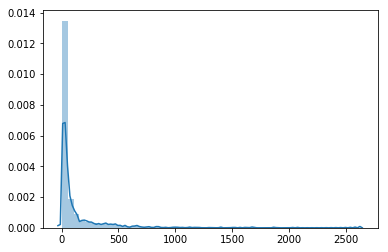

In [9]:
#numero di tag assegnati da ogni utente
#calcolare la media e la moda della distribuzione
cont=0
array=[]
visited=[]
for x in np.array(data5):
    a=x[0]
    b=x[2]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[0]
            d=y[2]
            if a == c:
                cont = cont + 1
        array.append([a,cont])
        cont=0
a =[]
for e in array:
    a.append(e[1])
print("Plot the distribution of the number of tag assignments per each user")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

### 8. Plot the distribution of the number of distinct tag assignments per each artist, and calculate the average and mode of the distribution


In [24]:
# 8. Tracciare la distribuzione del numero di assegnazioni di tag distinti per ogni artista, e calcolare la media e la modalità di distribuzione.

#numero di tag assegnati per ogni artista univoci
#calcolare la media e la moda della distribuzione
taglist = []
array=[]
visited=[]
for x in np.array(data5):
    a=x[1]
    if(a not in visited):
        visited.append(a)
        for y in np.array(data5):
            c=y[1]
            d=y[2]
            if a == c:
                taglist.append(d)
        array.append([a,taglist])
        taglist = [] 

Plot the distribution of the number of tag assignments per each artist
calculate the average : 8.763874470973409
calculate the mode of the distribution : [1]


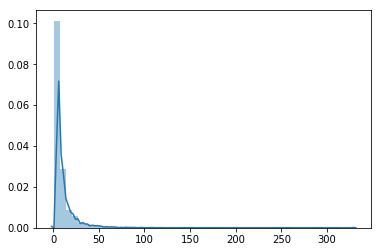

In [25]:
a =[]
#print(array[1])
for e in array:
    #print(e[1])
    f = np.array(e[1])
    ff = np.unique(f)
    lun = len(ff)
    a.append(lun)
print("Plot the distribution of the number of tag assignments per each artist")
sns.distplot(a)
print("calculate the average :", np.mean(a))
print("calculate the mode of the distribution :",stats.mode(a)[0])

## Task2: Clustering tags

Clustering music tags according to the artists association (content vectors).

1. Cluster tags according to the association to artists​. ​Justify your choices and comments on the results. Consider at least two different clustering algorithms based on similarity between tags, and compare the clustering.